## 1. Discharge Monitoring at S.R.-79 on the Caloosahatchee River

### 1.1 Selecting Discharge Station on Caloosahatchee River

The USGS site number 02292900 corresponds to the streamflow monitoring station at the Caloosahatchee River at S.R.-79 near Olga, Florida. This station, also known as the Franklin Lock and Dam (S-79), has been operational since 1966 and is a key point for monitoring freshwater flow into the Caloosahatchee Estuary.

This site is managed by the U.S. Geological Survey (USGS) and provides real-time and historical data on streamflow, which is crucial for water resource management, ecological studies, and flood forecasting.

USGS site data: https://waterdata.usgs.gov/nwis/inventory?site_no=02292900 

In [2]:
import pandas as pd
import os
import pandas as pd
import requests
import zipfile
from io import BytesIO
import shutil

df_dis = pd.read_csv('USGS Data Science Project.csv')
df_dis

,Source,Site Number,Date,Discharge,Qualification
0,USGS,2292900,1/1/1993,14.0,A
1,USGS,2292900,1/2/1993,160.0,A
2,USGS,2292900,1/3/1993,820.0,A
3,USGS,2292900,1/4/1993,11.0,A
4,USGS,2292900,1/5/1993,9.2,A
...,...,...,...,...,...
11778,USGS,2292900,4/1/2025,1870.0,P
11779,USGS,2292900,4/2/2025,1390.0,P
11780,USGS,2292900,4/3/2025,1050.0,P
11781,USGS,2292900,4/4/2025,849.0,P


In [3]:
df_dis.Date = pd.to_datetime(df_dis.Date)
df_dis.Date.dtypes

dtype('<M8[ns]')

In [4]:
columns = ['Source', 'Site Number', 'Date', 'Discharge']
df_dis = df_dis[columns]
df_dis

,Source,Site Number,Date,Discharge
0,USGS,2292900,1993-01-01,14.0
1,USGS,2292900,1993-01-02,160.0
2,USGS,2292900,1993-01-03,820.0
3,USGS,2292900,1993-01-04,11.0
4,USGS,2292900,1993-01-05,9.2
...,...,...,...,...
11778,USGS,2292900,2025-04-01,1870.0
11779,USGS,2292900,2025-04-02,1390.0
11780,USGS,2292900,2025-04-03,1050.0
11781,USGS,2292900,2025-04-04,849.0


In [5]:
# Data cleaned
df_dis_clean = df_dis.dropna()

parameters = ['Discharge']
units = ['cfs']

metadata = {
    'Discharge': {'Unit': 'cfs'}
}

summary_data = []

for column in df_dis.columns:
    if column not in metadata:
        continue

    col_data = df_dis[column].dropna()
    stats = {
        'Parameter': column,
        'Unit': metadata[column]['Unit'],
        'Min': round(col_data.min(), 2),
        'Mean': round(col_data.mean(), 2),
        'Median': round(col_data.median(), 2),
        'Max': round(col_data.max(), 2)
    }
    summary_data.append(stats)

df_dis_summary = pd.DataFrame(summary_data)
display(df_dis_summary)

,Parameter,Unit,Min,Mean,Median,Max
0,Discharge,cfs,0.0,2104.5,1220.0,25300.0


### 1.2 Caloosahatchee River Discharge

This section processes discharge data from the Caloosahatchee River at the S-79 structure, obtained from the USGS. The data is filtered to retain daily mean discharge values, and timestamps are converted to datetime format for alignment with other environmental datasets. The section ensures the discharge values are numeric and drops any rows with missing data.

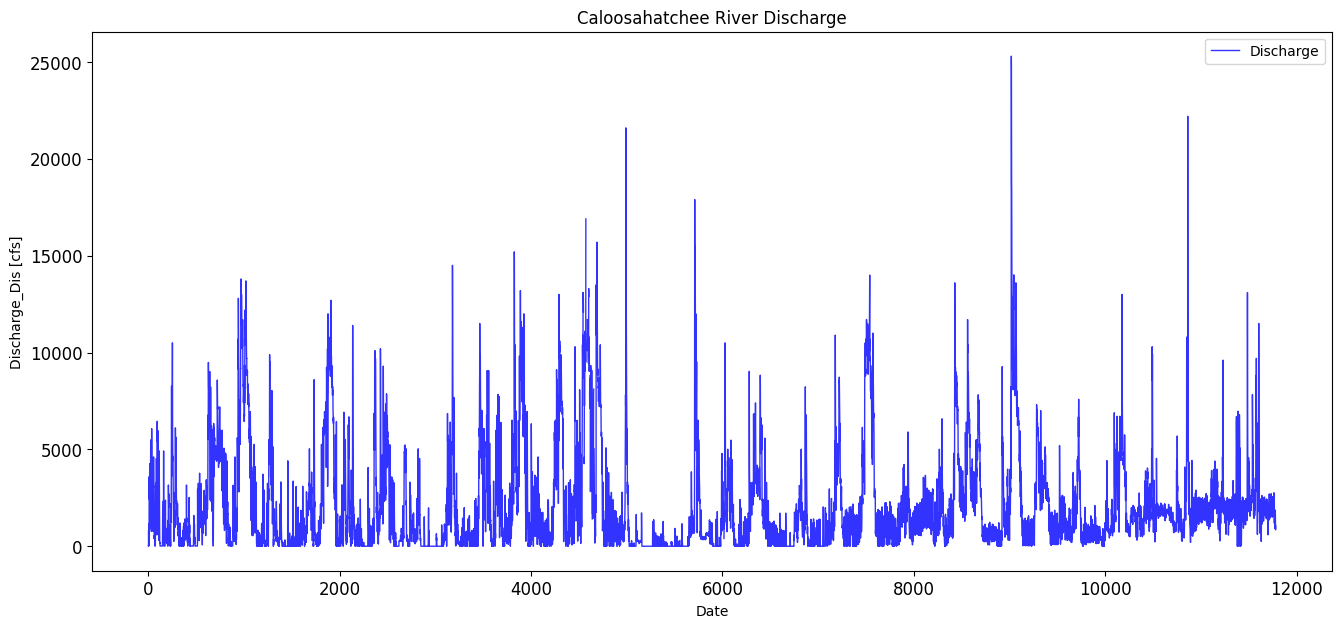

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Line plot of discharge
df_dis[['Discharge']].plot(
    color=['blue'],
    linewidth=1,
    xlabel='Date',
    ylabel='Discharge_Dis [cfs]',
    figsize=(16, 7),
    title='Caloosahatchee River Discharge',
    grid=False,
    legend=True,
    style=['-'],
    alpha=0.8,
    rot=0,
    fontsize=12,
);

In [7]:
max_discharge_dis = df_dis['Discharge'].max()
print(max_discharge_dis)

25300.0


In [8]:
avg_discharge_dis = df_dis['Discharge'].mean()
print(avg_discharge_dis)

2104.5010027425437


### 1.3 Creating a Continuous Discharge Record 

This section addresses gaps in the Caloosahatchee River discharge dataset by applying interpolation and filling techniques. Missing discharge values are first replaced with NaNs, then interpolated linearly to estimate intermediate values. Any remaining missing values at the start or end of the series are filled using forward and backward fill methods. The cleaned and gap-filled dataset is then visualized in a time series plot spanning from 1993 to 2025, showing the long-term variability in daily discharge rates. This step ensures a continuous discharge record for use in later modeling and analysis.

In [9]:
# Replace 0s with NaN in 'Discharge' column
df_dis.loc[:, 'Discharge'] = df_dis['Discharge'].replace(0, pd.NA)

# Interpolate missing values linearly
df_dis.loc[:, 'Discharge'] = df_dis['Discharge'].interpolate(method='linear')

# Fill remaining NaNs at the start/end using forward/backward fill
df_dis.loc[:, 'Discharge'] = df_dis['Discharge'].ffill().bfill()

C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\2941276119.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[14.0 160.0 820.0 ... 1050.0 849.0 1050.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_dis.loc[:, 'Discharge'] = df_dis['Discharge'].replace(0, pd.NA)
C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\2941276119.py:5: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_dis.loc[:, 'Discharge'] = df_dis['Discharge'].interpolate(method='linear')
C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\2941276119.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future

C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\3119331194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dis['Date'] = pd.to_datetime(df_dis['Date'])


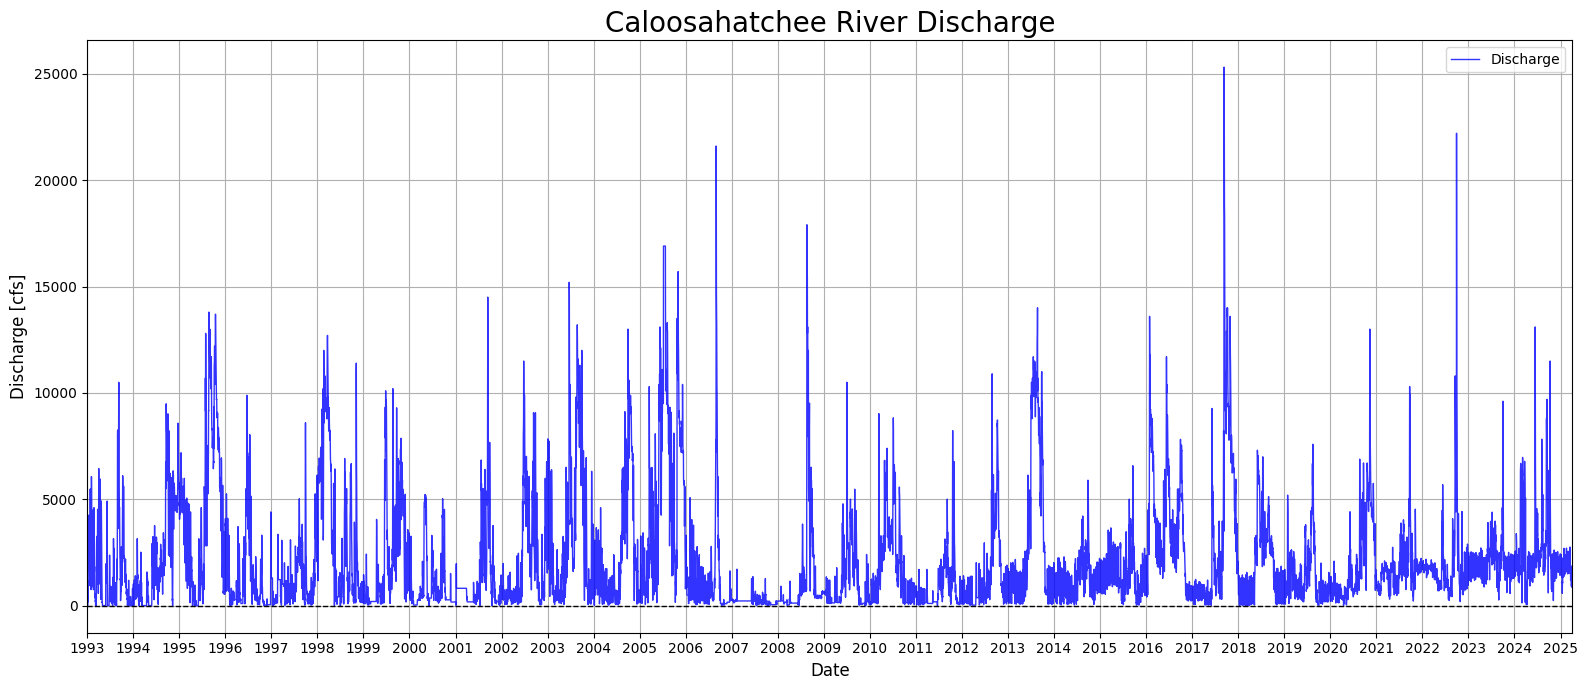

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' is datetime
df_dis['Date'] = pd.to_datetime(df_dis['Date'])

# Create plot
plt.figure(num=18, figsize=(16, 7))
plt.plot(df_dis['Date'], df_dis['Discharge'], color='blue', linewidth=1, linestyle='-', alpha=0.8, label='Discharge')

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(df_dis['Date'].min(), df_dis['Date'].max())

# Add horizontal line at 0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge [cfs]', fontsize=12)
plt.title('Caloosahatchee River Discharge', fontsize=20)
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 1.4 Discharge With Hurricane Season Noted

This section enhances the Caloosahatchee River discharge time series by visually marking the Atlantic hurricane season (June 1 to November 30) for each year in the dataset. Using a loop, shaded bands are dynamically added to the plot for every hurricane season between 1993 and 2025. This contextual overlay allows for a clearer visual association between periods of heightened tropical activity and observed discharge spikes. By highlighting these seasonal windows, the plot provides insight into how discharge patterns may be influenced by rainfall and runoff associated with hurricanes and tropical storms, which are relevant for nutrient loading and potential HAB triggers.

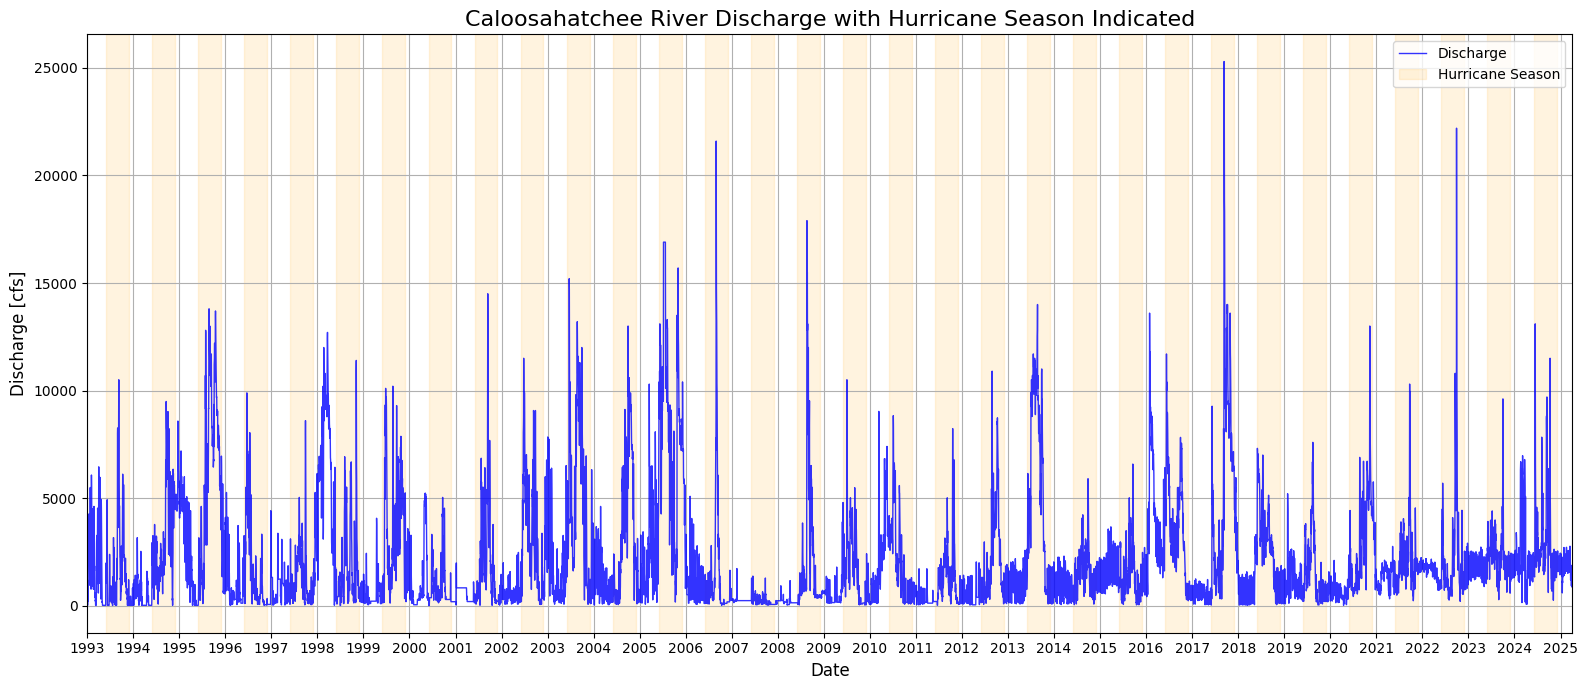

In [11]:
from datetime import datetime

plt.figure(num=19, figsize=(16, 7))
plt.plot(df_dis['Date'], df_dis['Discharge'], color='blue', linewidth=1, linestyle='-', alpha=0.8, label='Discharge')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(df_dis['Date'].min(), df_dis['Date'].max())

# Highlight hurricane season
years = df_dis['Date'].dt.year.unique()
for year in years:
    start = pd.Timestamp(f"{year}-06-01")
    end = pd.Timestamp(f"{year}-11-30")
    plt.axvspan(start, end, color='orange', alpha=0.125, label='Hurricane Season' if year == years[0] else "")

plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge [cfs]', fontsize=12)
plt.title('Caloosahatchee River Discharge with Hurricane Season Indicated', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

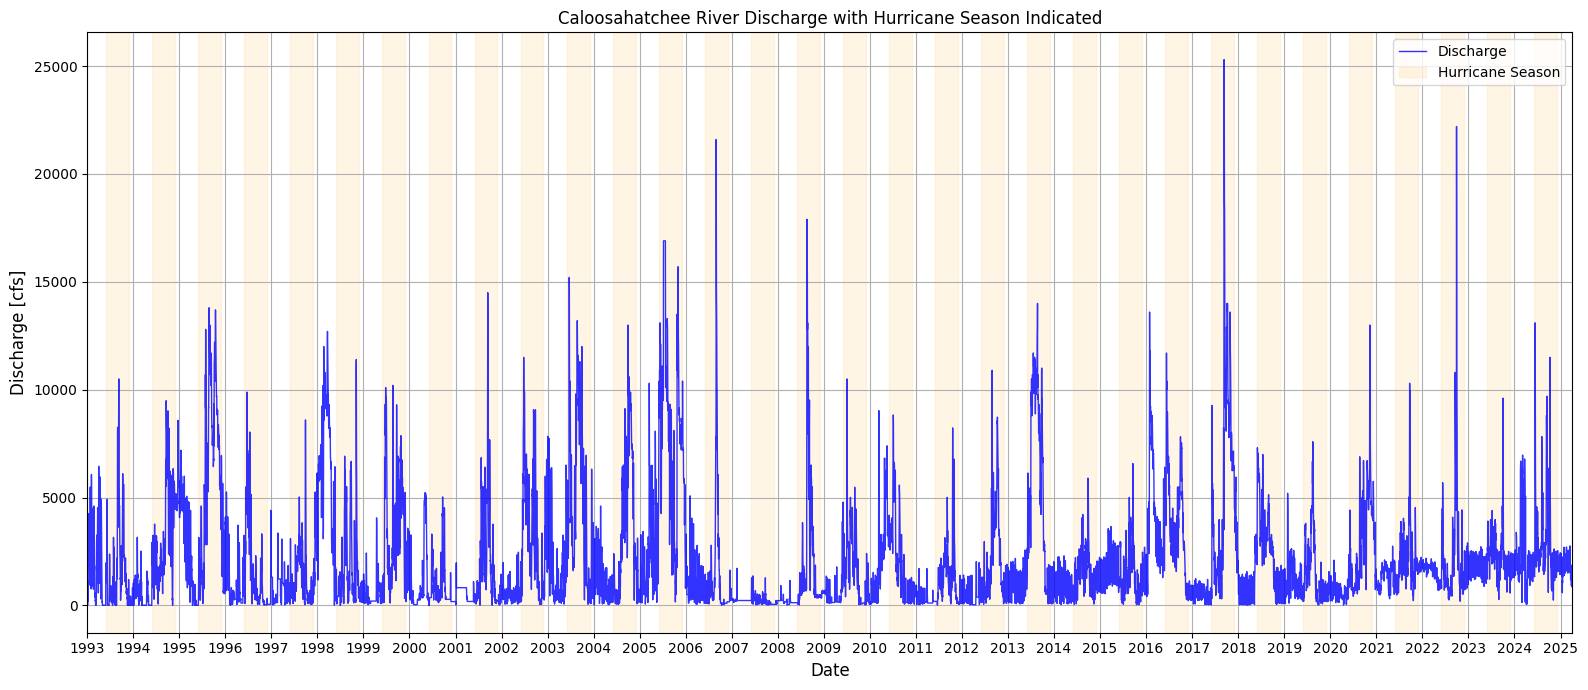

In [12]:
plt.figure(num=20, figsize=(16, 7))
plt.plot(df_dis['Date'], df_dis['Discharge'], color='blue', linewidth=1, linestyle='-', alpha=0.8, label='Discharge')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(df_dis['Date'].min(), df_dis['Date'].max())

# Shade hurricane season for each year
for year in df_dis['Date'].dt.year.unique():
    start = pd.Timestamp(f"{year}-06-01")
    end = pd.Timestamp(f"{year}-11-30")
    plt.axvspan(start, end, color='orange', alpha=0.1, label='Hurricane Season' if year == df_dis['Date'].dt.year.unique()[0] else "")

plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge [cfs]', fontsize=12)
plt.title('Caloosahatchee River Discharge with Hurricane Season Indicated', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Nutrient Data for the Caloosahatchee River: TN and TP Monitoring

The Total Nitrogen (TN) and Total Phosphorus (TP) data for both the upper and lower Caloosahatchee River were obtained from Florida's STORET repository, a state-managed version of the EPA's national water quality database. These records include monitoring results from agencies like the Florida Department of Environmental Protection and Lee County's Environmental Laboratory. 

The dataset provides time-stamped, geolocated measurements of nutrient concentrations, which are essential for assessing eutrophication risk and forecasting red tide conditions driven by land-based nutrient runoff.

Water Atlas data site: https://chnep.wateratlas.usf.edu/ 

### 2.1 Nutrient Data: Upper Caloosahatchee (Olga, FL)

This section loads nutrient monitoring data from the upper Caloosahatchee River at the S.R. 79 (Olga) station and prepares it for analysis. The dataset is filtered to extract relevant nutrient parameters and converted to datetime format for alignment with other variables.

In [13]:
import pandas as pd

# Load the Caloosahatchee nutrient data
nutrient_data = pd.read_csv("TN_TP_Caloosa.csv")

# Preview the dataset
nutrient_data.head()

,WBodyID,WaterBodyName,DataSource,StationID,StationName,Actual_StationID,Actual_Latitude,Actual_Longitude,DEP_WBID,SampleDate,...,DepthUnits,Parameter,Characteristic,Sample_Fraction,Result_Value,Result_Unit,QACode,Result_Comment,Original_Result_Value,Original_Result_Unit
0,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.7212,-81.693248,3235A,4/29/1999 0:00,...,m,TP_mgl,Phosphorus as P,Total,0.096,mg/l,NaN,NaN,0.096,mg/l
1,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.7212,-81.693248,3235A,4/29/1999 0:00,...,m,TP_mgl,Phosphorus as P,Total,0.099,mg/l,NaN,NaN,0.099,mg/l
2,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.7212,-81.693248,3235A,4/29/1999 0:00,...,m,TN_mgl,Nitrogen,NaN,1.498,mg/l,NaN,Water Institute Calculated,NaN,NaN
3,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.7212,-81.693248,3235A,5/24/1999 0:00,...,m,TP_mgl,Phosphorus as P,Total,0.170,mg/l,JQ,**JQ** The precision was outside the QC limit....,0.170,mg/l
4,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.7212,-81.693248,3235A,5/24/1999 0:00,...,m,TN_mgl,Nitrogen,NaN,1.600,mg/l,NaN,Water Institute Calculated,NaN,NaN


In [14]:
# Convert sample date to datetime
nutrient_data['SampleDate'] = pd.to_datetime(nutrient_data['SampleDate'], errors='coerce')

# Filter by nutrient type for Upper Caloosahatchee
tp_data_upper = nutrient_data[nutrient_data['Parameter'] == 'TP_mg/l']
tn_data_upper = nutrient_data[nutrient_data['Parameter'] == 'TN_mg/l']

nutrient_data

,WBodyID,WaterBodyName,DataSource,StationID,StationName,Actual_StationID,Actual_Latitude,Actual_Longitude,DEP_WBID,SampleDate,...,DepthUnits,Parameter,Characteristic,Sample_Fraction,Result_Value,Result_Unit,QACode,Result_Comment,Original_Result_Value,Original_Result_Unit
0,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.721200,-81.693248,3235A,1999-04-29,...,m,TP_mgl,Phosphorus as P,Total,0.096,mg/l,NaN,NaN,0.096,mg/l
1,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.721200,-81.693248,3235A,1999-04-29,...,m,TP_mgl,Phosphorus as P,Total,0.099,mg/l,NaN,NaN,0.099,mg/l
2,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.721200,-81.693248,3235A,1999-04-29,...,m,TN_mgl,Nitrogen,NaN,1.498,mg/l,NaN,Water Institute Calculated,NaN,NaN
3,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.721200,-81.693248,3235A,1999-05-24,...,m,TP_mgl,Phosphorus as P,Total,0.170,mg/l,JQ,**JQ** The precision was outside the QC limit....,0.170,mg/l
4,300081,Caloosahatchee River,STORET_21FLGW,3568,CALOOSAHATCHEE RIVER AT S.R. 79 NEAR OLGA,3568,26.721200,-81.693248,3235A,1999-05-24,...,m,TN_mgl,Nitrogen,NaN,1.600,mg/l,NaN,Water Institute Calculated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,300081,Caloosahatchee River,WIN_21FLSFWM,18245,S79,18245,26.722735,-81.691019,3235A,2025-01-06,...,m,TP_mgl,Phosphorus as P,Total,0.111,mg/l,NaN,NaN,0.111,mg/L
1744,300081,Caloosahatchee River,WIN_21FLSFWM,18245,S79,18245,26.722735,-81.691019,3235A,2025-01-06,...,m,TN_mgl,Nitrogen,Dissolved,1.100,mg/l,NaN,NaN,1.100,mg/L
1745,300081,Caloosahatchee River,WIN_21FLSFWM,18245,S79,18245,26.722735,-81.691019,3235A,2025-01-06,...,m,TN_mgl,Nitrogen,Total,1.260,mg/l,NaN,NaN,1.260,mg/L
1746,300081,Caloosahatchee River,WIN_21FLSFWM,18245,S79,18245,26.722735,-81.691019,3235A,2025-01-13,...,m,TP_mgl,Phosphorus as P,Total,0.096,mg/l,NaN,NaN,0.096,mg/L


### 2.2 Total Phosphorous Over Time (Outliers Removed)

This section filters and visualizes TP data at the Olga station, removing outliers using the interquartile range (IQR) method. After converting values to numeric format and dropping any missing entries, the code calculates the lower and upper bounds for acceptable values and filters out extreme outliers. The cleaned data is then plotted as a time series.

The resulting chart shows TP concentrations over time from approximately 1999 to 2024. The data appears sparse before 2015 but becomes more densely sampled in recent years. Most values cluster between 0.05 and 0.15 mg/L, with a slight downward trend and reduced variability over time—possibly reflecting changes in land use, management practices, or sampling consistency.

C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\3999490599.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_data_upper['Result_Value'] = pd.to_numeric(tp_data_upper['Result_Value'], errors='coerce')


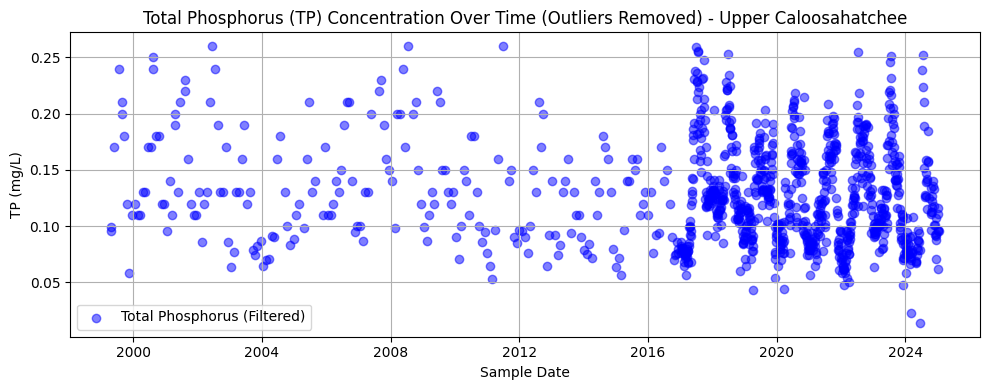

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Nutrient Data (Upper Caloosahatchee - Olga, FL) ---
nutrient_data = pd.read_csv("TN_TP_Caloosa.csv")  # or your local path
nutrient_data['SampleDate'] = pd.to_datetime(nutrient_data['SampleDate'], errors='coerce')

# Filter by correct nutrient labels (check spelling)
tp_data_upper = nutrient_data[nutrient_data['Parameter'] == 'TP_mgl']
tn_data_upper = nutrient_data[nutrient_data['Parameter'] == 'TN_mgl']

# --- 2. Clean and Filter TP Data ---
tp_data_upper['Result_Value'] = pd.to_numeric(tp_data_upper['Result_Value'], errors='coerce')
tp_clean_upper = tp_data_upper.dropna(subset=['Result_Value'])

# Detect and filter out outliers using IQR
Q1_tp = tp_clean_upper['Result_Value'].quantile(0.25)
Q3_tp = tp_clean_upper['Result_Value'].quantile(0.75)
IQR_tp = Q3_tp - Q1_tp

tp_filtered_upper = tp_clean_upper[
    (tp_clean_upper['Result_Value'] >= Q1_tp - 1.5 * IQR_tp) &
    (tp_clean_upper['Result_Value'] <= Q3_tp + 1.5 * IQR_tp)
]

# --- 3. Plot Filtered TP Data ---
plt.figure(figsize=(10, 4))
plt.scatter(tp_filtered_upper['SampleDate'], tp_filtered_upper['Result_Value'],
            alpha=0.5, color='blue', label='Total Phosphorus (Filtered)')
plt.title('Total Phosphorus (TP) Concentration Over Time (Outliers Removed) - Upper Caloosahatchee')
plt.xlabel('Sample Date')
plt.ylabel('TP (mg/L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 2.3 Total Nitrogen Over Time (Outliers Removed)

This section processes TN data at the Olga station by converting result values to numeric format, dropping missing entries, and removing statistical outliers using the interquartile range (IQR) method. The filtered dataset is then plotted to visualize trends over time.

The resulting chart displays TN concentrations from the late 1990s through 2024. Like the phosphorus dataset, early records are sparse, with sampling density increasing significantly after 2015. Most values range between 1.0 and 1.6 mg/L. There is no obvious long-term trend, but a tighter clustering of values in more recent years may reflect improved monitoring consistency or reduced variability in nutrient inputs.

C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\468480445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_data_upper['Result_Value'] = pd.to_numeric(tn_data_upper['Result_Value'], errors='coerce')


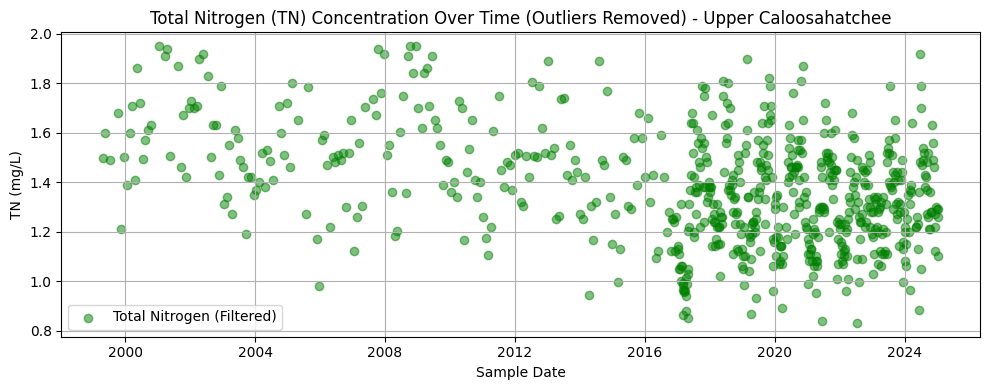

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Convert TN values to float
tn_data_upper['Result_Value'] = pd.to_numeric(tn_data_upper['Result_Value'], errors='coerce')

# Remove NaNs
tn_clean_upper = tn_data_upper.dropna(subset=['Result_Value'])

# Detect outliers using IQR
Q1 = tn_clean_upper['Result_Value'].quantile(0.25)
Q3 = tn_clean_upper['Result_Value'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
tn_filtered_upper = tn_clean_upper[
    (tn_clean_upper['Result_Value'] >= Q1 - 1.5 * IQR) &
    (tn_clean_upper['Result_Value'] <= Q3 + 1.5 * IQR)
]

# Plot filtered TN data
plt.figure(figsize=(10, 4))
plt.scatter(tn_filtered_upper['SampleDate'], tn_filtered_upper['Result_Value'],
            alpha=0.5, color='green', label='Total Nitrogen (Filtered)')
plt.title('Total Nitrogen (TN) Concentration Over Time (Outliers Removed) - Upper Caloosahatchee')
plt.xlabel('Sample Date')
plt.ylabel('TN (mg/L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 2.4 Combined TN and TP Trendline, Olga, FL (Outliers Removed)

This section aggregates the cleaned nutrient data into monthly averages to reveal long-term trends in nitrogen and phosphorus concentrations at the Olga monitoring site. Missing months are interpolated to produce continuous time series for both parameters. The data is visualized in two synchronized subplots sharing the same time axis.

The top plot shows a monthly trend of TN concentrations, which fluctuate but show a general decline in variability and magnitude over the past two decades. The bottom plot illustrates the TP trend, which is more seasonally variable and features sharper peaks, especially in the mid-2000s and late 2010s. Together, these plots highlight nutrient dynamics over time and provide context for understanding their potential role in fueling algal blooms downstream.

In [17]:
# Resample monthly and interpolate missing months
tn_monthly_upper = tn_filtered_upper.set_index('SampleDate')['Result_Value'].resample('M').mean().asfreq('M').interpolate()
tp_monthly_upper = tp_filtered_upper.set_index('SampleDate')['Result_Value'].resample('M').mean().asfreq('M').interpolate()

C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\2975870262.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tn_monthly_upper = tn_filtered_upper.set_index('SampleDate')['Result_Value'].resample('M').mean().asfreq('M').interpolate()
C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\2975870262.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tp_monthly_upper = tp_filtered_upper.set_index('SampleDate')['Result_Value'].resample('M').mean().asfreq('M').interpolate()


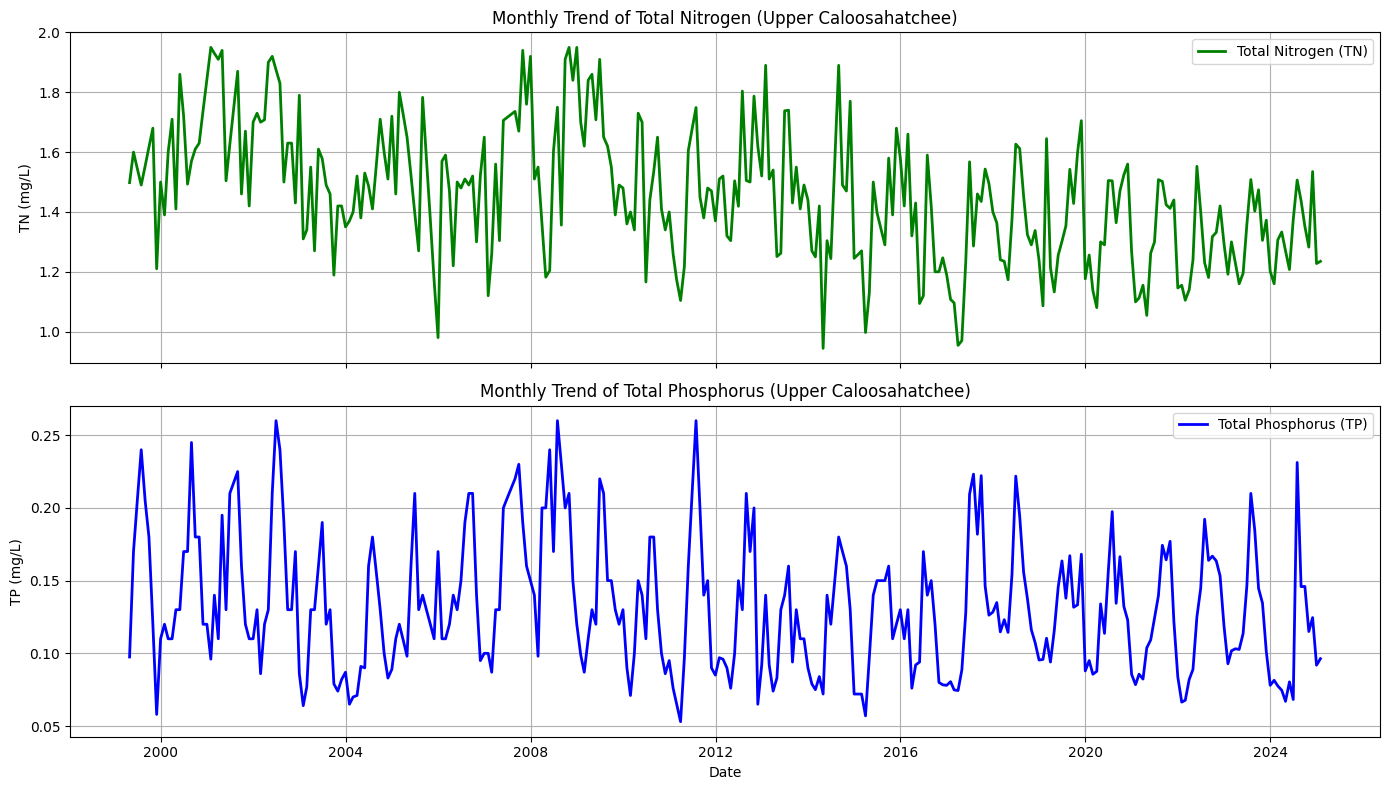

In [18]:
import matplotlib.pyplot as plt

# Plot TN and TP on two subplots (shared x-axis)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot TN
ax1.plot(tn_monthly_upper.index, tn_monthly_upper.values, color='green', label='Total Nitrogen (TN)', linewidth=2)
ax1.set_ylabel('TN (mg/L)')
ax1.set_title('Monthly Trend of Total Nitrogen (Upper Caloosahatchee)')
ax1.grid(True)
ax1.legend()

# Plot TP
ax2.plot(tp_monthly_upper.index, tp_monthly_upper.values, color='blue', label='Total Phosphorus (TP)', linewidth=2)
ax2.set_ylabel('TP (mg/L)')
ax2.set_title('Monthly Trend of Total Phosphorus (Upper Caloosahatchee)')
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

### 2.5 Nutrient Data: Lower Caloosahatchee (Fort Myers, FL)

This section loads nutrient monitoring data for the tidal portion of the Caloosahatchee River near Fort Myers. As with the upper river data, this dataset includes TN and TP measurements and is used to complement the upstream records. Including this site allows the analysis to capture nutrient movement downstream, offering a fuller picture of how concentrations evolve as water flows from the Olga station toward the Gulf of Mexico.

In [19]:
import pandas as pd

# Load the Caloosahatchee nutrient data
nutrient_tidal = pd.read_csv("TN_TP_Tidal_Caloosa.csv")

# Preview the dataset
nutrient_tidal.head()

,WBodyID,WaterBodyName,DataSource,StationID,StationName,Actual_StationID,Actual_Latitude,Actual_Longitude,DEP_WBID,SampleDate,...,DepthUnits,Parameter,Characteristic,Sample_Fraction,Result_Value,Result_Unit,QACode,Result_Comment,Original_Result_Value,Original_Result_Unit
0,9000108,Lower Tidal Caloosahatchee River,STORET_21FLEECO,DEEPGR10,DEEP LAGOON- McGregor Blvd.,DEEPGR10,26.53932,-81.9188,3240A,10/16/1990 0:00,...,m,TP_mgl,Phosphorus as P,Total,0.16,mg/l,NaN,NaN,0.16,mg/l
1,9000108,Lower Tidal Caloosahatchee River,STORET_21FLEECO,DEEPGR10,DEEP LAGOON- McGregor Blvd.,DEEPGR10,26.53932,-81.9188,3240A,10/16/1990 0:00,...,m,TN_mgl,Nitrogen,Total,1.27,mg/l,NaN,Water Institute Calculated: TKN + NOx,NaN,NaN
2,9000108,Lower Tidal Caloosahatchee River,STORET_21FLEECO,DEEPGR10,DEEP LAGOON- McGregor Blvd.,DEEPGR10,26.53932,-81.9188,3240A,10/31/1990 0:00,...,m,TN_mgl,Nitrogen,Total,4.77,mg/l,NaN,Water Institute Calculated: TKN + NOx,NaN,NaN
3,9000108,Lower Tidal Caloosahatchee River,STORET_21FLEECO,DEEPGR10,DEEP LAGOON- McGregor Blvd.,DEEPGR10,26.53932,-81.9188,3240A,10/31/1990 0:00,...,m,TP_mgl,Phosphorus as P,Total,0.10,mg/l,NaN,NaN,0.10,mg/l
4,9000108,Lower Tidal Caloosahatchee River,STORET_21FLEECO,DEEPGR10,DEEP LAGOON- McGregor Blvd.,DEEPGR10,26.53932,-81.9188,3240A,11/19/1990 0:00,...,m,TP_mgl,Phosphorus as P,Total,0.11,mg/l,NaN,NaN,0.11,mg/l


### 2.6 Total Phosphorous Over Time (Outliers Removed)

This section repeats the methods of Section 2.2 for the tidal Caloosahatchee River.

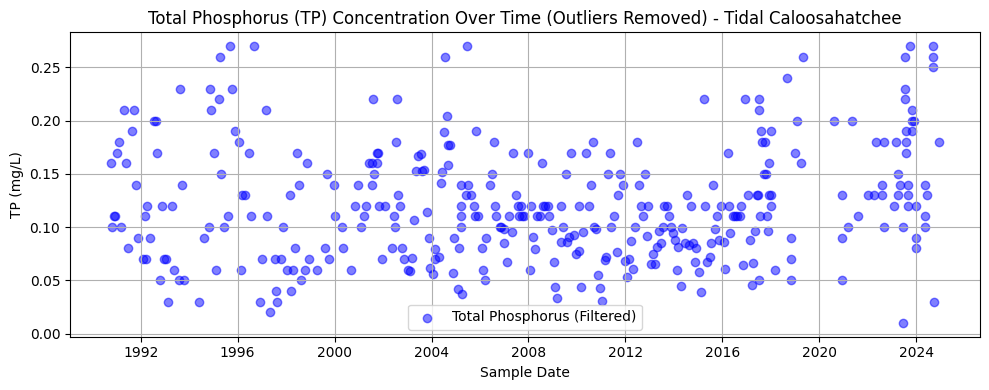

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Strip any trailing/leading whitespace from column names
nutrient_tidal.columns = nutrient_tidal.columns.str.strip()

# --- Convert TP values to numeric ---
tp_data_tidal = nutrient_tidal[nutrient_tidal['Parameter'] == 'TP_mgl'].copy()
tp_data_tidal['Result_Value'] = pd.to_numeric(tp_data_tidal['Result_Value'], errors='coerce')
tp_data_tidal['SampleDate'] = pd.to_datetime(tp_data_tidal['SampleDate'], errors='coerce')

# --- Remove NaNs ---
tp_clean_tidal = tp_data_tidal.dropna(subset=['Result_Value'])

# --- Detect outliers using IQR ---
Q1_tp = tp_clean_tidal['Result_Value'].quantile(0.25)
Q3_tp = tp_clean_tidal['Result_Value'].quantile(0.75)
IQR_tp = Q3_tp - Q1_tp

# --- Filter out outliers ---
tp_filtered_tidal = tp_clean_tidal[
    (tp_clean_tidal['Result_Value'] >= Q1_tp - 1.5 * IQR_tp) &
    (tp_clean_tidal['Result_Value'] <= Q3_tp + 1.5 * IQR_tp)
]

# --- Plot Filtered TP data ---
plt.figure(figsize=(10, 4))
plt.scatter(tp_filtered_tidal['SampleDate'], tp_filtered_tidal['Result_Value'], 
            alpha=0.5, color='blue', label='Total Phosphorus (Filtered)')
plt.title('Total Phosphorus (TP) Concentration Over Time (Outliers Removed) - Tidal Caloosahatchee')
plt.xlabel('Sample Date')
plt.ylabel('TP (mg/L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 2.7 Total Nitrogen Over Time (Outliers Removed)

This section repeats the methods of Section 2.3 for the tidal Caloosahatchee River.

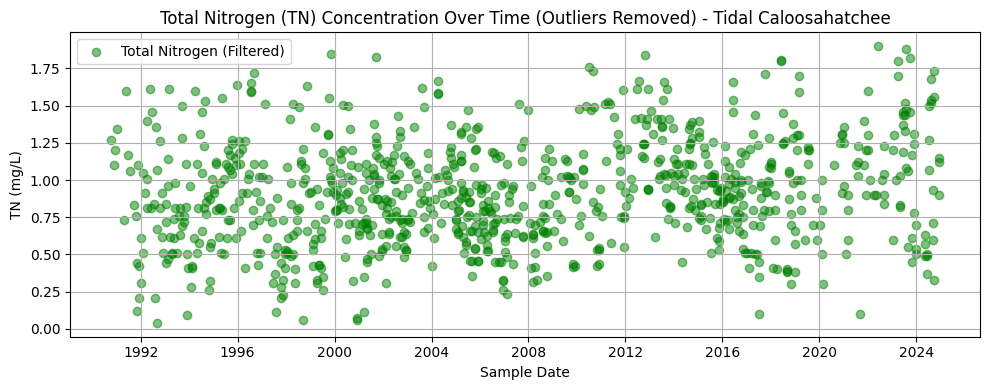

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Filter and convert TN values
tn_data_tidal = nutrient_tidal[nutrient_tidal['Parameter'] == 'TN_mgl'].copy()
tn_data_tidal['Result_Value'] = pd.to_numeric(tn_data_tidal['Result_Value'], errors='coerce')
tn_data_tidal['SampleDate'] = pd.to_datetime(tn_data_tidal['SampleDate'], errors='coerce')

# Remove NaNs
tn_clean_tidal = tn_data_tidal.dropna(subset=['Result_Value'])

# Detect outliers using IQR
Q1_tn_tidal = tn_clean_tidal['Result_Value'].quantile(0.25)
Q3_tn_tidal = tn_clean_tidal['Result_Value'].quantile(0.75)
IQR_tn_tidal = Q3_tn_tidal - Q1_tn_tidal

# Filter out outliers
tn_filtered_tidal = tn_clean_tidal[
    (tn_clean_tidal['Result_Value'] >= Q1_tn_tidal - 1.5 * IQR_tn_tidal) &
    (tn_clean_tidal['Result_Value'] <= Q3_tn_tidal + 1.5 * IQR_tn_tidal)
]

# Plot Filtered TN data
plt.figure(figsize=(10, 4))
plt.scatter(tn_filtered_tidal['SampleDate'], tn_filtered_tidal['Result_Value'], 
            alpha=0.5, color='green', label='Total Nitrogen (Filtered)')
plt.title('Total Nitrogen (TN) Concentration Over Time (Outliers Removed) - Tidal Caloosahatchee')
plt.xlabel('Sample Date')
plt.ylabel('TN (mg/L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 2.8 Combined TN and TP Trendline, Fort Myers (Outliers Removed)

This section repeats the methods of Section 2.4 for the tidal Caloosahatchee River.

In [22]:
# --- Resample monthly and interpolate missing months for Tidal Caloosahatchee ---
tn_monthly_tidal = tn_filtered_tidal.set_index('SampleDate')['Result_Value'] \
    .resample('M').mean().asfreq('M').interpolate()

tp_monthly_tidal = tp_filtered_tidal.set_index('SampleDate')['Result_Value'] \
    .resample('M').mean().asfreq('M').interpolate()

C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\4036337590.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean().asfreq('M').interpolate()
C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\4036337590.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean().asfreq('M').interpolate()


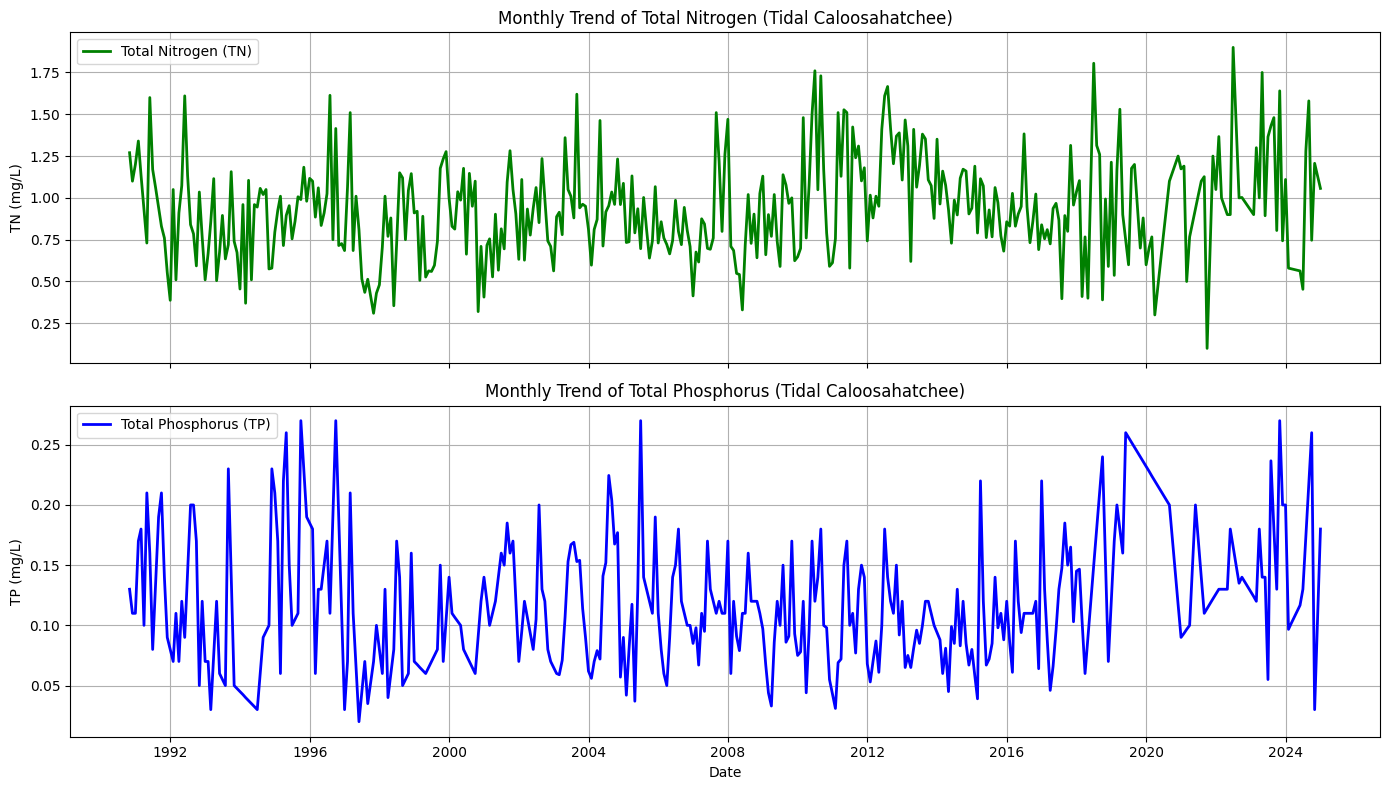

In [23]:
import matplotlib.pyplot as plt

# --- Plot TN and TP trends for Tidal Caloosahatchee in stacked subplots ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# TN plot
ax1.plot(tn_monthly_tidal.index, tn_monthly_tidal.values, color='green', linewidth=2, label='Total Nitrogen (TN)')
ax1.set_ylabel('TN (mg/L)')
ax1.set_title('Monthly Trend of Total Nitrogen (Tidal Caloosahatchee)')
ax1.grid(True)
ax1.legend()

# TP plot
ax2.plot(tp_monthly_tidal.index, tp_monthly_tidal.values, color='blue', linewidth=2, label='Total Phosphorus (TP)')
ax2.set_ylabel('TP (mg/L)')
ax2.set_title('Monthly Trend of Total Phosphorus (Tidal Caloosahatchee)')
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

### 2.9 Combined and Averaged Time Series for the Caloosahatchee River

To better support the machine learning analysis, we combined the TN and TP data from both the upper (Olga) and lower (Fort Myers) Caloosahatchee River sites.

This was done by averaging the monthly resampled and interpolated TN and TP concentrations from both locations. The result is a single, unified timeseries for TN and TP that represents the average nutrient concentrations flowing out of the Caloosahatchee River.

This provides a more comprehensive and simplified input for evaluating how nutrient levels may correlate with harmful algal bloom (HAB) activity in downstream coastal waters.

In [24]:
# --- Combine and average monthly TN and TP data from upper and tidal Caloosahatchee ---

# First align the date indices to ensure no mismatch
tn_monthly_upper = tn_monthly_upper.sort_index()
tp_monthly_upper = tp_monthly_upper.sort_index()
tn_monthly_tidal = tn_monthly_tidal.sort_index()
tp_monthly_tidal = tp_monthly_tidal.sort_index()

# Align on same monthly date index (outer join, then take average where both exist)
combined_tn = pd.concat([tn_monthly_upper, tn_monthly_tidal], axis=1)
combined_tp = pd.concat([tp_monthly_upper, tp_monthly_tidal], axis=1)

# Rename columns for clarity
combined_tn.columns = ['TN_Upper', 'TN_Tidal']
combined_tp.columns = ['TP_Upper', 'TP_Tidal']

# Take the average (will ignore NaN if one side is missing)
combined_tn['TN_Avg'] = combined_tn.mean(axis=1)
combined_tp['TP_Avg'] = combined_tp.mean(axis=1)

# Extract final single-column Series for modeling
tn_avg = combined_tn['TN_Avg']
tp_avg = combined_tp['TP_Avg']

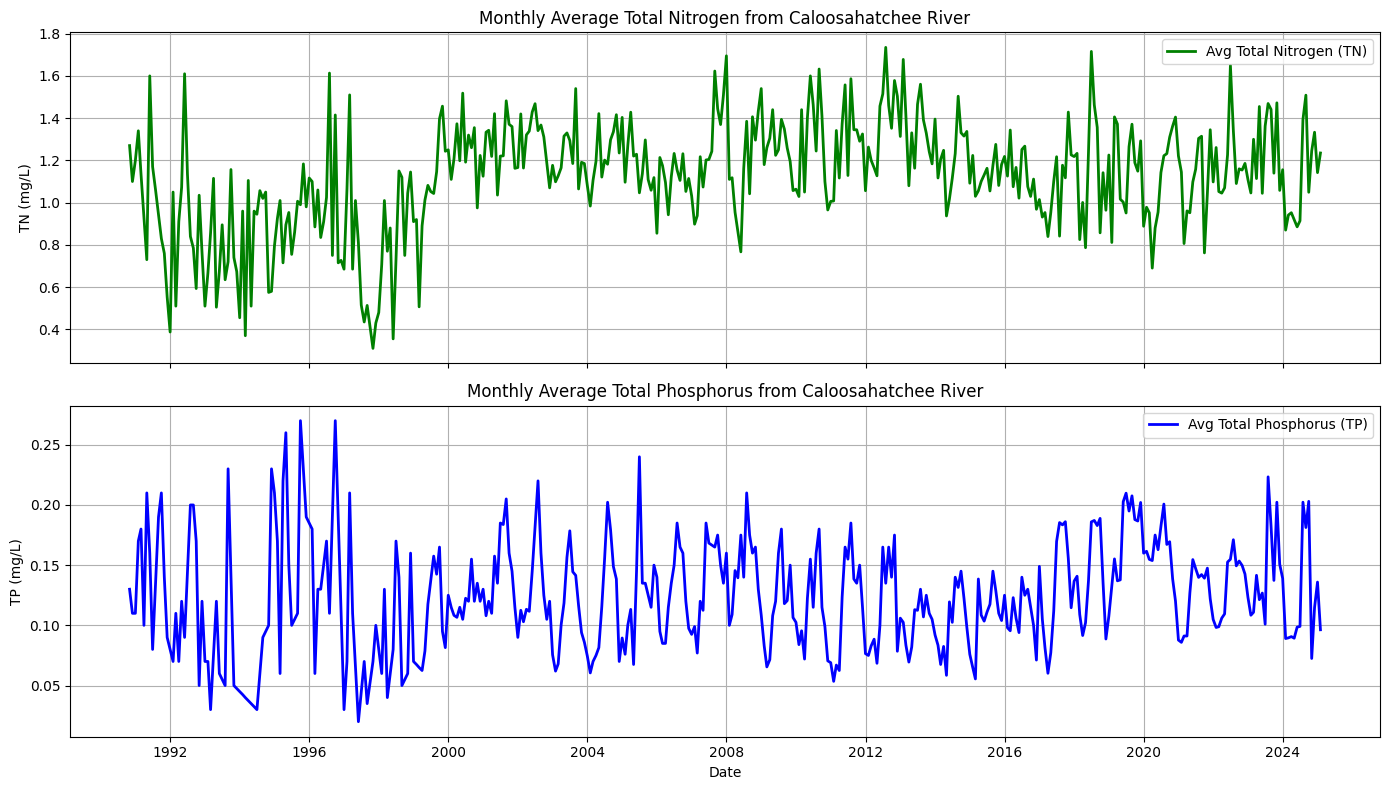

In [25]:
import matplotlib.pyplot as plt

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot TN
ax1.plot(tn_avg.index, tn_avg.values, color='green', linewidth=2, label='Avg Total Nitrogen (TN)')
ax1.set_ylabel('TN (mg/L)')
ax1.set_title('Monthly Average Total Nitrogen from Caloosahatchee River')
ax1.grid(True)
ax1.legend()

# Plot TP
ax2.plot(tp_avg.index, tp_avg.values, color='blue', linewidth=2, label='Avg Total Phosphorus (TP)')
ax2.set_ylabel('TP (mg/L)')
ax2.set_title('Monthly Average Total Phosphorus from Caloosahatchee River')
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## 3. Resampling Caloosahatchee TN and TP to Match Peace River

There are discrepancies between the Peace River and Caloosahatchee River TN and TP datasets. Namely, the Peace River TN and TP is sampled daily and is measured in ugl, while the Caloosahatchee River TN and TP is averaged monthly and measured in mgl. The following code updates the Caloosahatchee River data to match the Peace River data in preparation for creating a feature file to be used in the Peace River code. 

In [26]:
import pandas as pd

# --- Load upper and tidal nutrient data ---
df_upper = pd.read_csv("TN_TP_Caloosa.csv")
df_tidal = pd.read_csv("TN_TP_Tidal_Caloosa.csv")

def prepare_daily_nutrient_series(df, tn_code='TN_mgl', tp_code='TP_mgl'):
    df = df.copy()

    # Convert to datetime
    df['SampleDate'] = pd.to_datetime(df['SampleDate'])

    # Filter for TN and TP
    df_tn = df[df['Parameter'] == tn_code][['SampleDate', 'Result_Value']].copy()
    df_tp = df[df['Parameter'] == tp_code][['SampleDate', 'Result_Value']].copy()

    # Convert mg/L to µg/L
    df_tn['Result_Value'] *= 1000
    df_tp['Result_Value'] *= 1000

    # Group by date and average if more than one reading per day
    tn_daily = df_tn.groupby('SampleDate').mean()
    tp_daily = df_tp.groupby('SampleDate').mean()

    # Reindex to full date range and interpolate missing days
    full_range = pd.date_range(start=df['SampleDate'].min(), end=df['SampleDate'].max(), freq='D')
    tn_daily = tn_daily.reindex(full_range).interpolate()
    tp_daily = tp_daily.reindex(full_range).interpolate()

    # Rename columns for clarity
    tn_daily.columns = ['TN']
    tp_daily.columns = ['TP']

    return tn_daily, tp_daily

# --- Prepare upper and tidal separately ---
tn_upper, tp_upper = prepare_daily_nutrient_series(df_upper)
tn_tidal, tp_tidal = prepare_daily_nutrient_series(df_tidal)

# --- Combine and average across stations ---
combined_tn = pd.concat([tn_upper, tn_tidal], axis=1)
combined_tp = pd.concat([tp_upper, tp_tidal], axis=1)

combined_tn.columns = ['TN_Upper', 'TN_Tidal']
combined_tp.columns = ['TP_Upper', 'TP_Tidal']

# Take the daily average (ignores NaN if only one site sampled)
combined_tn['TN_Avg'] = combined_tn.mean(axis=1)
combined_tp['TP_Avg'] = combined_tp.mean(axis=1)

# Extract final time series
tn_avg = combined_tn[['TN_Avg']]
tp_avg = combined_tp[['TP_Avg']]

# Optional: merge into one DataFrame
df_nutrients_daily = pd.concat([tn_avg, tp_avg], axis=1)

# View result
print(df_nutrients_daily.head())


                 TN_Avg  TP_Avg
1990-10-16  1270.000000   160.0
1990-10-17  1503.333333   156.0
1990-10-18  1736.666667   152.0
1990-10-19  1970.000000   148.0
1990-10-20  2203.333333   144.0


## 4. Combine Discharge and TN/TP Data Frames

Below, we combined daily-averaged discharge, total nitrogen, and total phosphorus data into a unified feature set. Discharge was downsampled to match the monthly resolution of the nutrient data. This dataset captures key flow and nutrient conditions from the Caloosahatchee River system and is structured to match the Peace River format for ML modeling.

In [27]:
print(df_dis.index)
print(df_nutrients_daily.index)

RangeIndex(start=0, stop=11783, step=1)
DatetimeIndex(['1990-10-16', '1990-10-17', '1990-10-18', '1990-10-19',
               '1990-10-20', '1990-10-21', '1990-10-22', '1990-10-23',
               '1990-10-24', '1990-10-25',
               ...
               '2025-01-04', '2025-01-05', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-11',
               '2025-01-12', '2025-01-13'],
              dtype='datetime64[ns]', length=12509, freq='D')


In [28]:
# Convert df_dis['Date'] to datetime and set it as index
df_dis['Date'] = pd.to_datetime(df_dis['Date'])
df_dis.set_index('Date', inplace=True)

# Make sure df_nutrients_daily index is also datetime (you've already done this)
df_nutrients_daily.index = pd.to_datetime(df_nutrients_daily.index)

# Now safely concatenate based on the datetime index
df_combined = pd.concat([df_dis, df_nutrients_daily], axis=1, join='inner')  # only keeps overlapping dates

# Drop any remaining NaNs if needed
df_combined.dropna(inplace=True)

# Check results
print(df_combined.head())

           Source  Site Number Discharge       TN_Avg  TP_Avg
1993-01-01   USGS      2292900      14.0  1126.071429    70.0
1993-01-02   USGS      2292900     160.0  1076.428571    70.0
1993-01-03   USGS      2292900     820.0  1026.785714    70.0
1993-01-04   USGS      2292900      11.0   977.142857    70.0
1993-01-05   USGS      2292900       9.2   927.500000    70.0


C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\534825520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dis['Date'] = pd.to_datetime(df_dis['Date'])


In [29]:
# Ensure Date column is present and set as datetime index for df_dis
df_dis = df_dis.copy()
if df_dis.index.name == 'Date':
    df_dis.reset_index(inplace=True)  # brings 'Date' back as a column

df_dis['Date'] = pd.to_datetime(df_dis['Date'])  # ensure datetime format
df_dis.set_index('Date', inplace=True)  # set as index for alignment

# Ensure df_nutrients_daily index is datetime
df_nutrients_daily.index = pd.to_datetime(df_nutrients_daily.index)

# Concatenate on aligned datetime index
df_combined = pd.concat([df_dis, df_nutrients_daily], axis=1, join='inner')

# Rename nutrient columns to match ML features
df_combined.rename(columns={
    'TN_Avg': 'caloosa_total_nitrogen',
    'TP_Avg': 'caloosa_total_phosphorus'
}, inplace=True)

# Drop rows with missing data
df_combined.dropna(inplace=True)

# Reset index so 'Date' becomes a column again
df_combined.reset_index(inplace=True)

# Confirm the column is actually named 'Date'
print(df_combined.columns)

# Save to CSV (no need to reselect columns if they're already right)
df_combined.to_csv('caloosa_features.csv', index=False)

# View result
print(df_combined.head())

Index(['index', 'Source', 'Site Number', 'Discharge', 'caloosa_total_nitrogen',
       'caloosa_total_phosphorus'],
      dtype='object')
       index Source  Site Number Discharge  caloosa_total_nitrogen  \
0 1993-01-01   USGS      2292900      14.0             1126.071429   
1 1993-01-02   USGS      2292900     160.0             1076.428571   
2 1993-01-03   USGS      2292900     820.0             1026.785714   
3 1993-01-04   USGS      2292900      11.0              977.142857   
4 1993-01-05   USGS      2292900       9.2              927.500000   

   caloosa_total_phosphorus  
0                      70.0  
1                      70.0  
2                      70.0  
3                      70.0  
4                      70.0  


In [30]:
# Reset index so 'Date' becomes a column again
df_combined.reset_index(inplace=True)

# Rename the index column to 'Date' explicitly
df_combined.rename(columns={'index': 'Date'}, inplace=True)

# Optional: reorder columns
df_combined = df_combined[['Date', 'Discharge', 'caloosa_total_nitrogen', 'caloosa_total_phosphorus']]

# Save to CSV
df_combined.to_csv('caloosa_features.csv', index=False)

# Preview
print(df_combined.head())

        Date Discharge  caloosa_total_nitrogen  caloosa_total_phosphorus
0 1993-01-01      14.0             1126.071429                      70.0
1 1993-01-02     160.0             1076.428571                      70.0
2 1993-01-03     820.0             1026.785714                      70.0
3 1993-01-04      11.0              977.142857                      70.0
4 1993-01-05       9.2              927.500000                      70.0


In [31]:
# Rename 'Discharge' to match naming convention
df_combined.rename(columns={'Discharge': 'caloosa_discharge'}, inplace=True)
df_combined.head()

,Date,caloosa_discharge,caloosa_total_nitrogen,caloosa_total_phosphorus
0,1993-01-01,14.0,1126.071429,70.0
1,1993-01-02,160.0,1076.428571,70.0
2,1993-01-03,820.0,1026.785714,70.0
3,1993-01-04,11.0,977.142857,70.0
4,1993-01-05,9.2,927.500000,70.0


## 4. Create Caloosahatchee Features File

In [32]:
# Restore date column for resampling
df_combined = pd.read_csv('caloosa_features.csv')  # Reload if needed
df_combined['Date'] = pd.to_datetime(df_combined['Date'])  # Ensure proper datetime type
df_combined.set_index('Date', inplace=True)  # Set Date as index for resampling
# Rename 'Discharge' to match naming convention
df_combined.rename(columns={'Discharge': 'caloosa_discharge'}, inplace=True)
df_combined.head()

,caloosa_discharge,caloosa_total_nitrogen,caloosa_total_phosphorus
Date,,,
1993-01-01,14.0,1126.071429,70.0
1993-01-02,160.0,1076.428571,70.0
1993-01-03,820.0,1026.785714,70.0
1993-01-04,11.0,977.142857,70.0
1993-01-05,9.2,927.500000,70.0


## 5. Resample Caloosahatchee Data to Weekly

The final data for the Peace River parameters is interpolated weekly, so we need to resample the Calooshatchee data to weekly. 

In [33]:
# Resample to weekly (Monday start) using mean for each variable
df_caloosa_weekly = df_combined.resample('W-MON').mean()

# Optional: check the result
print(df_caloosa_weekly.head())

# Save as a new weekly file to match the professor's format
df_caloosa_weekly.to_csv('caloosa_weekly.csv')


            caloosa_discharge  caloosa_total_nitrogen  \
Date                                                    
1993-01-04         251.250000             1051.607143   
1993-01-11        1528.600000              778.571429   
1993-01-18        3398.571429              792.936508   
1993-01-25        2687.000000              798.333333   
1993-02-01        2979.142857              765.925926   

            caloosa_total_phosphorus  
Date                                  
1993-01-04                 70.000000  
1993-01-11                 70.000000  
1993-01-18                 67.142857  
1993-01-25                 58.000000  
1993-02-01                 48.666667  


### 5.1 Add Time Column to Caloosahatchee Dataset

In [34]:
import pandas as pd

# Load Caloosahatchee data with datetime index
df_caloosa = pd.read_csv('caloosa_weekly.csv', index_col=0, parse_dates=True)

# Add 'time' column from index
df_caloosa['time'] = df_caloosa.index

# Optional: move 'time' to the front
df_caloosa = df_caloosa[['time', 'caloosa_discharge', 'caloosa_total_nitrogen', 'caloosa_total_phosphorus']]

# Save updated file
df_caloosa.to_csv('caloosa_weekly_with_time.csv', index=False)

### 5.2 Convert Caloosa TN and TP to mg/L

In [35]:
# Load Caloosahatchee features with time column
df_caloosa = pd.read_csv("caloosa_weekly_with_time.csv", parse_dates=['time'])

# Convert TN and TP from µg/L to mg/L
df_caloosa['caloosa_total_nitrogen'] = df_caloosa['caloosa_total_nitrogen'] / 1000
df_caloosa['caloosa_total_phosphorus'] = df_caloosa['caloosa_total_phosphorus'] / 1000

# Save updated version (overwrites file with corrected units)
df_caloosa.to_csv("caloosa_weekly_with_time.csv", index=False)

## 6. Merge with Peace River Data

In [36]:
# Load Peace River + atmospheric + ocean features
df_peace = pd.read_csv('data_weekly_intepolated.csv', parse_dates=['time'])

# Load Caloosahatchee features
df_caloosa = pd.read_csv('caloosa_weekly_with_time.csv', parse_dates=['time'])

# Merge on 'time' column
df_swfl_merged = pd.merge(df_peace, df_caloosa, on='time', how='outer')

# Drop rows with missing values
df_swfl_merged.dropna(inplace=True)

# Save merged dataset
df_swfl_merged.to_csv('swfl_merged_features.csv', index=False)

# Preview merged dataset (optional)
df_swfl_merged.head()

,time,kb,zos,salinity,water_temp,wind_direction,wind_speed,peace_discharge,peace_TN,peace_TP,caloosa_discharge,caloosa_total_nitrogen,caloosa_total_phosphorus
0,1993-01-04,333.0,0.012906,33.043478,26.8,36.0,13.9,202.0,8.2000,1.999091,251.250000,1.051607,0.070000
1,1993-01-11,667.0,0.015614,33.065217,27.0,118.0,16.2,423.0,10.1000,1.934545,1528.600000,0.778571,0.070000
2,1993-01-18,667.0,0.021702,33.086957,27.1,108.0,16.2,1470.0,12.0000,1.870000,3398.571429,0.792937,0.067143
3,1993-01-25,0.0,0.015950,33.108696,26.8,110.0,12.6,1450.0,10.0475,1.870500,2687.000000,0.798333,0.058000
4,1993-02-01,0.0,0.008977,33.130435,26.5,14.0,17.5,1490.0,8.0950,1.871000,2979.142857,0.765926,0.048667


In [37]:
df_swfl_merged.tail()

,time,kb,zos,salinity,water_temp,wind_direction,wind_speed,peace_discharge,peace_TN,peace_TP,caloosa_discharge,caloosa_total_nitrogen,caloosa_total_phosphorus
1612,2023-11-27,0.0,-0.005114,36.0,27.110714,79.800000,11.666667,326.0,2.0675,0.8365,1822.857143,1.203413,0.152143
1613,2023-12-04,0.0,-0.003981,36.0,26.992857,91.466667,12.306667,231.0,2.1800,0.8000,1336.571429,1.249048,0.150464
1614,2023-12-11,0.0,-0.009013,36.0,26.528571,83.833333,12.086667,201.0,1.8400,0.7900,1782.857143,1.151432,0.136031
1615,2023-12-18,0.0,0.005557,36.0,26.207143,110.433333,12.176667,460.0,2.2080,0.9700,1845.714286,1.038714,0.119810
1616,2023-12-25,0.0,0.001243,36.0,26.053571,92.166667,13.396667,470.0,2.2080,0.9700,1798.571429,1.017036,0.111671


## 7. Add Tampa KB Counts

In [38]:
import pandas as pd

# Load SWFL merged features
df_swfl = pd.read_csv('swfl_merged_features.csv', parse_dates=['time'])

# Load full HABSOS dataset
df_tampa = pd.read_csv('habsos_20240430.csv', parse_dates=['SAMPLE_DATE'])

# Filter to Tampa Bay region using your specified bounding box
df_tampa = df_tampa[
    (df_tampa['LATITUDE'].between(27.4, 28.2)) &
    (df_tampa['LONGITUDE'].between(-83.0, -82.3))
]

# Rename columns for clarity
df_tampa.rename(columns={'SAMPLE_DATE': 'time', 'CELLCOUNT': 'kb_tampa'}, inplace=True)

# Group by date to get daily average KB concentration for Tampa region
df_tampa_daily = df_tampa.groupby('time', as_index=False)['kb_tampa'].mean()

# Merge with the existing SWFL dataset on 'time'
df_swfl_tampa = pd.merge(df_swfl, df_tampa_daily, on='time', how='left')

# Save to new CSV file
df_swfl_tampa.to_csv('swfl_merged_features_tampa.csv', index=False)

# Optional: preview the result
df_swfl_tampa.head()

C:\Users\mkduu\AppData\Local\Temp\ipykernel_65236\3940744265.py:7: DtypeWarning: Columns (21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tampa = pd.read_csv('habsos_20240430.csv', parse_dates=['SAMPLE_DATE'])


,time,kb,zos,salinity,water_temp,wind_direction,wind_speed,peace_discharge,peace_TN,peace_TP,caloosa_discharge,caloosa_total_nitrogen,caloosa_total_phosphorus,kb_tampa
0,1993-01-04,333.0,0.012906,33.043478,26.8,36.0,13.9,202.0,8.2000,1.999091,251.250000,1.051607,0.070000,0.0
1,1993-01-11,667.0,0.015614,33.065217,27.0,118.0,16.2,423.0,10.1000,1.934545,1528.600000,0.778571,0.070000,NaN
2,1993-01-18,667.0,0.021702,33.086957,27.1,108.0,16.2,1470.0,12.0000,1.870000,3398.571429,0.792937,0.067143,NaN
3,1993-01-25,0.0,0.015950,33.108696,26.8,110.0,12.6,1450.0,10.0475,1.870500,2687.000000,0.798333,0.058000,NaN
4,1993-02-01,0.0,0.008977,33.130435,26.5,14.0,17.5,1490.0,8.0950,1.871000,2979.142857,0.765926,0.048667,0.0


In [39]:
df_swfl_tampa['kb_tampa'] = df_swfl_tampa['kb_tampa'].fillna(0)

In [40]:
df_swfl_tampa.to_csv('swfl_merged_features_tampa.csv', index=False)
df_swfl_tampa.head()

,time,kb,zos,salinity,water_temp,wind_direction,wind_speed,peace_discharge,peace_TN,peace_TP,caloosa_discharge,caloosa_total_nitrogen,caloosa_total_phosphorus,kb_tampa
0,1993-01-04,333.0,0.012906,33.043478,26.8,36.0,13.9,202.0,8.2000,1.999091,251.250000,1.051607,0.070000,0.0
1,1993-01-11,667.0,0.015614,33.065217,27.0,118.0,16.2,423.0,10.1000,1.934545,1528.600000,0.778571,0.070000,0.0
2,1993-01-18,667.0,0.021702,33.086957,27.1,108.0,16.2,1470.0,12.0000,1.870000,3398.571429,0.792937,0.067143,0.0
3,1993-01-25,0.0,0.015950,33.108696,26.8,110.0,12.6,1450.0,10.0475,1.870500,2687.000000,0.798333,0.058000,0.0
4,1993-02-01,0.0,0.008977,33.130435,26.5,14.0,17.5,1490.0,8.0950,1.871000,2979.142857,0.765926,0.048667,0.0


In [41]:
# Add kb_tampa values to kb
df_swfl_tampa['kb'] = df_swfl_tampa['kb'] + df_swfl_tampa['kb_tampa']

# Drop the kb_tampa column
df_swfl_tampa.drop(columns=['kb_tampa'], inplace=True)
df_swfl_tampa.to_csv('swfl_merged_features_tampa.csv', index=False)
df_swfl_tampa.head()

,time,kb,zos,salinity,water_temp,wind_direction,wind_speed,peace_discharge,peace_TN,peace_TP,caloosa_discharge,caloosa_total_nitrogen,caloosa_total_phosphorus
0,1993-01-04,333.0,0.012906,33.043478,26.8,36.0,13.9,202.0,8.2000,1.999091,251.250000,1.051607,0.070000
1,1993-01-11,667.0,0.015614,33.065217,27.0,118.0,16.2,423.0,10.1000,1.934545,1528.600000,0.778571,0.070000
2,1993-01-18,667.0,0.021702,33.086957,27.1,108.0,16.2,1470.0,12.0000,1.870000,3398.571429,0.792937,0.067143
3,1993-01-25,0.0,0.015950,33.108696,26.8,110.0,12.6,1450.0,10.0475,1.870500,2687.000000,0.798333,0.058000
4,1993-02-01,0.0,0.008977,33.130435,26.5,14.0,17.5,1490.0,8.0950,1.871000,2979.142857,0.765926,0.048667


## Create Combined Data Series

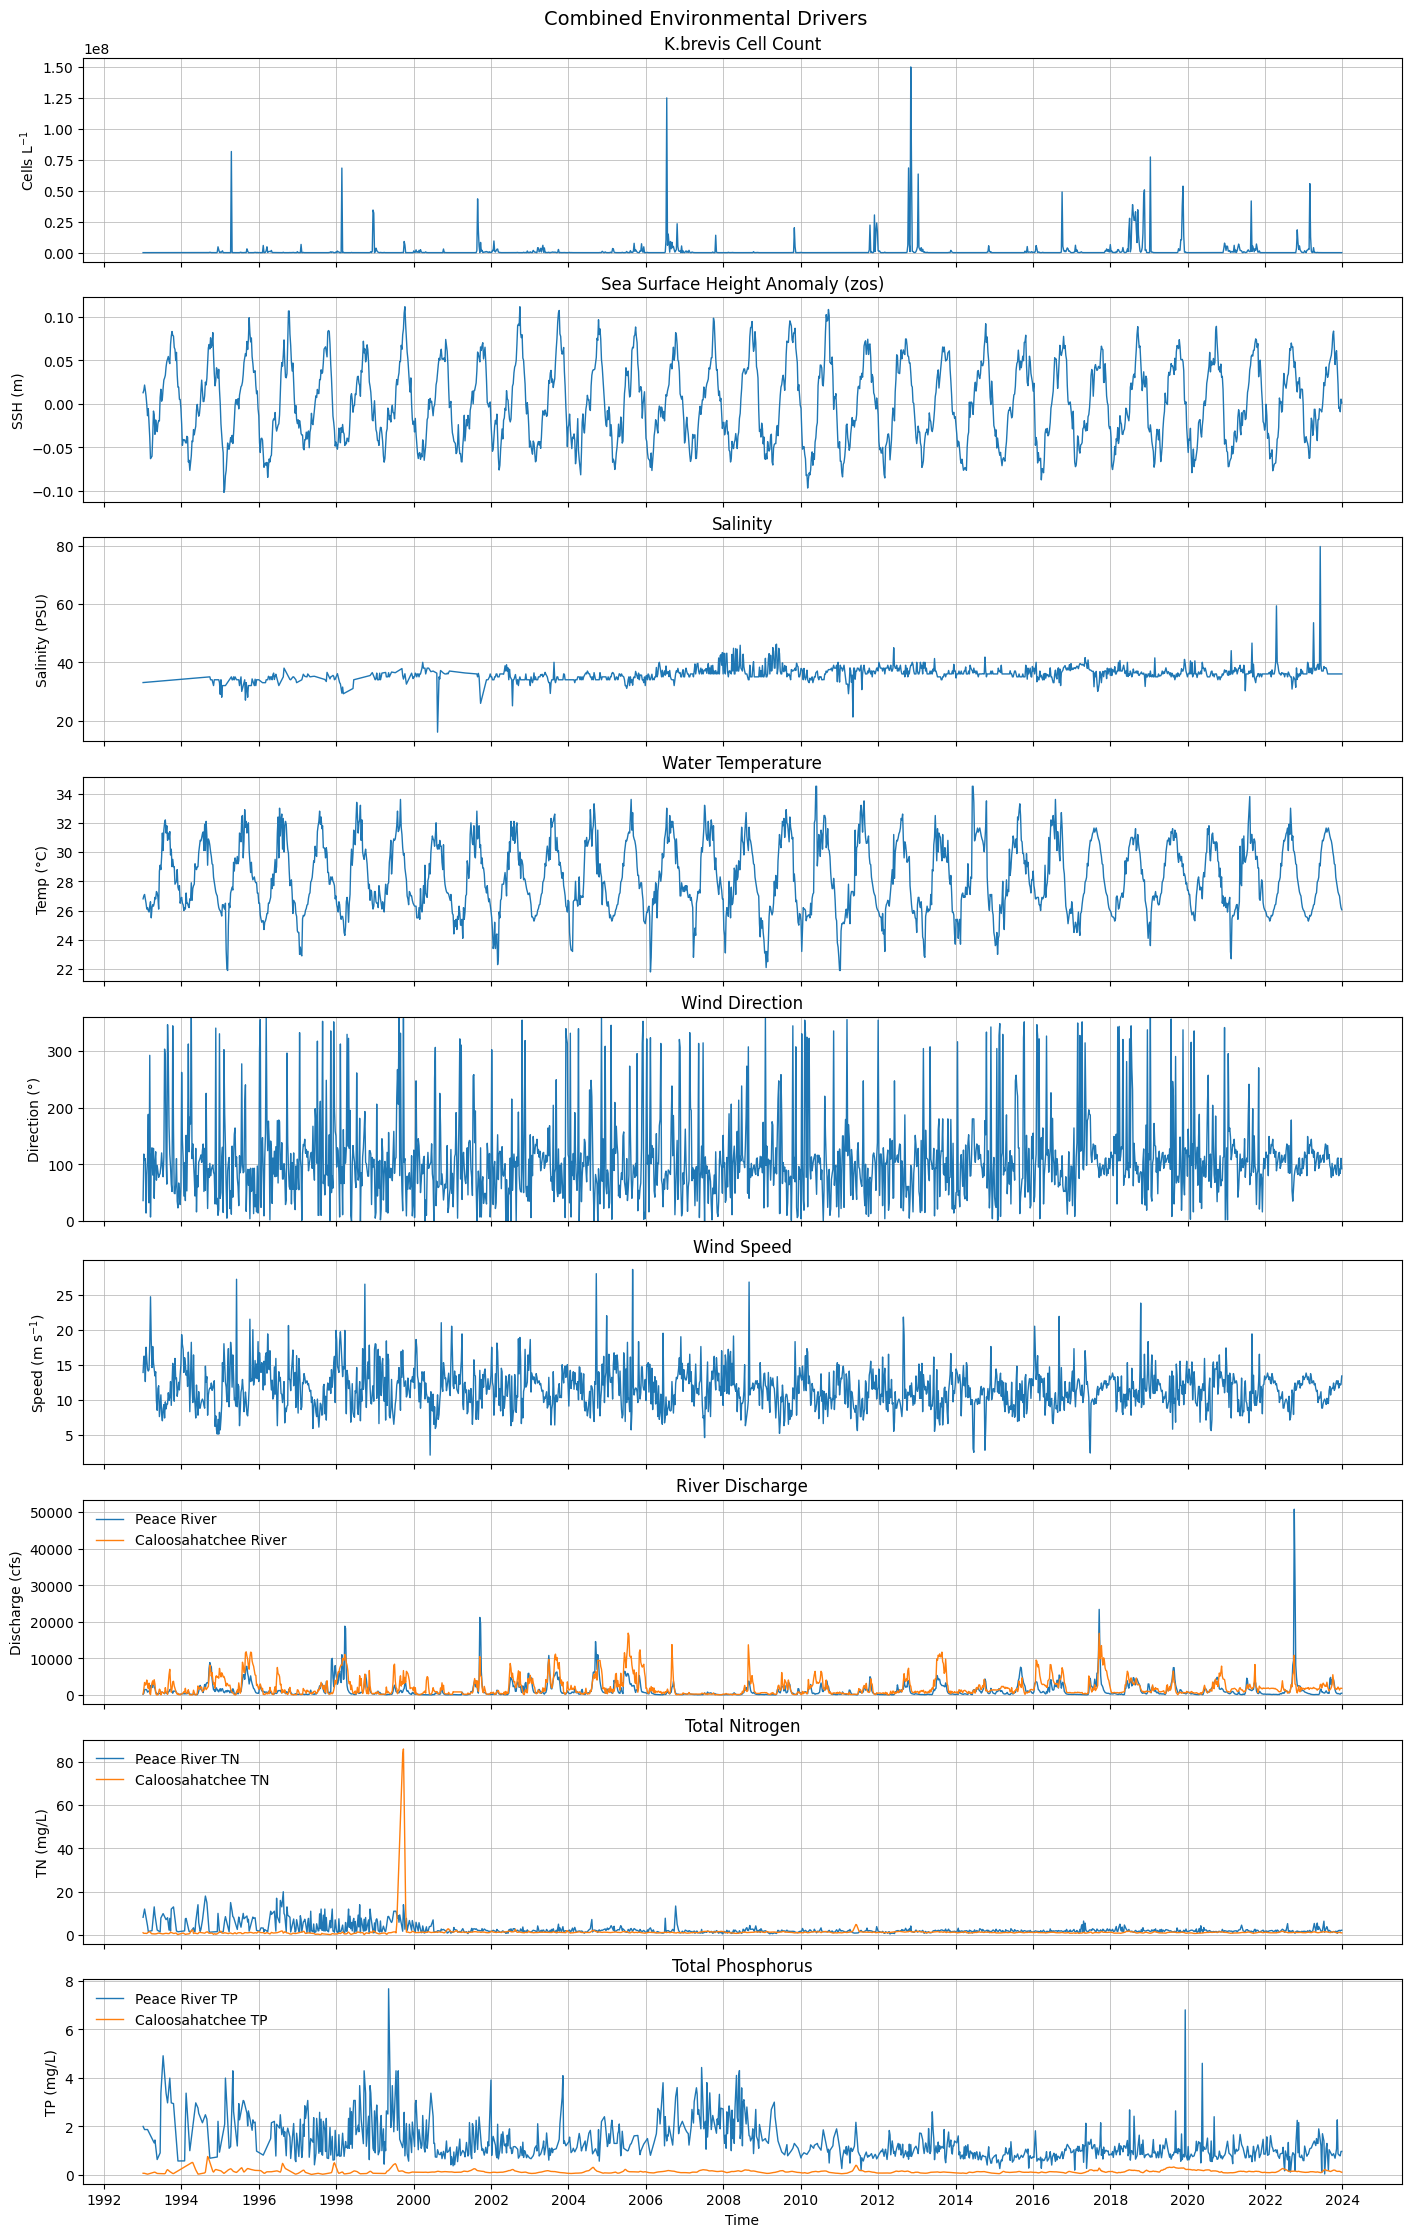

Saved figure to: C:\Users\mkduu\OneDrive\Documents\FGCU docs\Summer 25 Red Tide Project\Graphics\Parameters\stacked_parameters_9panel.png


In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# -----------------------------
# Load merged weekly dataset
# -----------------------------
# If df_swfl_tampa already exists in your notebook, you can comment this out.
df = df_swfl_tampa.copy()

# Ensure time is datetime + sorted
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values("time")

# Keep only columns we need (and coerce to numeric where applicable)
cols = [
    "time",
    "kb",
    "zos",
    "salinity",
    "water_temp",
    "wind_direction",
    "wind_speed",
    "peace_discharge",
    "caloosa_discharge",
    "peace_TN",
    "caloosa_total_nitrogen",
    "peace_TP",
    "caloosa_total_phosphorus",
]
df_plot = df[cols].copy()

for c in cols:
    if c != "time":
        df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

# -----------------------------
# Optional: match ML-ready behavior (drop rows with missing values)
# -----------------------------
df_plot = df_plot.dropna()

# -----------------------------
# Output path
# -----------------------------
out_dir = r"C:\Users\mkduu\OneDrive\Documents\FGCU docs\Summer 25 Red Tide Project\Graphics\Parameters"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "stacked_parameters_9panel.png")

# -----------------------------
# Plot setup (9 stacked panels)
# -----------------------------
fig, axes = plt.subplots(
    nrows=9,
    ncols=1,
    figsize=(14, 22),
    sharex=True,
    constrained_layout=True
)

# 1) Karenia brevis Cell Count
axes[0].plot(df_plot["time"], df_plot["kb"], linewidth=1.0)
axes[0].set_title("K.brevis Cell Count")
axes[0].set_ylabel("Cells L$^{-1}$")

# 2) Sea Surface Height (zos)
axes[1].plot(df_plot["time"], df_plot["zos"], linewidth=1.0)
axes[1].set_title("Sea Surface Height Anomaly (zos)")
axes[1].set_ylabel("SSH (m)")

# 3) Salinity
axes[2].plot(df_plot["time"], df_plot["salinity"], linewidth=1.0)
axes[2].set_title("Salinity")
axes[2].set_ylabel("Salinity (PSU)")

# 4) Water Temperature
axes[3].plot(df_plot["time"], df_plot["water_temp"], linewidth=1.0)
axes[3].set_title("Water Temperature")
axes[3].set_ylabel("Temp (°C)")

# 5) Wind Direction
axes[4].plot(df_plot["time"], df_plot["wind_direction"], linewidth=1.0)
axes[4].set_title("Wind Direction")
axes[4].set_ylabel("Direction (°)")
axes[4].set_ylim(0, 360)

# 6) Wind Speed
axes[5].plot(df_plot["time"], df_plot["wind_speed"], linewidth=1.0)
axes[5].set_title("Wind Speed")
axes[5].set_ylabel("Speed (m s$^{-1}$)")

# 7) Peace + Caloosa Discharge (cfs)
axes[6].plot(df_plot["time"], df_plot["peace_discharge"], linewidth=1.0, label="Peace River")
axes[6].plot(df_plot["time"], df_plot["caloosa_discharge"], linewidth=1.0, label="Caloosahatchee River")
axes[6].set_title("River Discharge")
axes[6].set_ylabel("Discharge (cfs)")
axes[6].legend(loc="upper left", frameon=False)

# 8) Peace + Caloosa Total Nitrogen (mg/L)
axes[7].plot(df_plot["time"], df_plot["peace_TN"], linewidth=1.0, label="Peace River TN")
axes[7].plot(df_plot["time"], df_plot["caloosa_total_nitrogen"], linewidth=1.0, label="Caloosahatchee TN")
axes[7].set_title("Total Nitrogen")
axes[7].set_ylabel("TN (mg/L)")
axes[7].legend(loc="upper left", frameon=False)

# 9) Peace + Caloosa Total Phosphorus (mg/L)
axes[8].plot(df_plot["time"], df_plot["peace_TP"], linewidth=1.0, label="Peace River TP")
axes[8].plot(df_plot["time"], df_plot["caloosa_total_phosphorus"], linewidth=1.0, label="Caloosahatchee TP")
axes[8].set_title("Total Phosphorus")
axes[8].set_ylabel("TP (mg/L)")
axes[8].legend(loc="upper left", frameon=False)

# -----------------------------
# X-axis formatting
# -----------------------------
axes[8].set_xlabel("Time")
axes[8].xaxis.set_major_locator(mdates.YearLocator(base=2))
axes[8].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

for ax in axes:
    ax.grid(True, linewidth=0.5)

# -----------------------------
# Save figure
# -----------------------------
fig.suptitle("Combined Environmental Drivers", y=1.01, fontsize=14)
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved figure to: {out_path}")

In [44]:
df_swfl_tampa[['time', 'caloosa_total_nitrogen']] \
    .sort_values('caloosa_total_nitrogen', ascending=False) \
    .head(5)

,time,caloosa_total_nitrogen
351,1999-09-27,85.896245
350,1999-09-20,83.198769
349,1999-09-13,73.401286
348,1999-09-06,63.663516
352,1999-10-04,62.848939
